In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path_train = 'train_spam.csv'
data = pd.read_csv(file_path_train)
X = data.drop('text_type', axis=1)
y = data['text_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,text
1157,going to take your babe out
3474,ken attached is a correction to pages 10 11 an...
4084,except android is a cucked
1383,stop been afraid stop the procrastination make...
14626,on aug 1635465 bort paul wrote if your sendmai...


In [10]:
X_test.head()

,text
11533,pi is a new digital currency developed by stan...
5862,𝐼 𝑑𝑜 𝑏𝑒𝑙𝑒𝑖𝑣𝑒 𝑜𝑛 𝑓𝑜𝑟𝑒𝑥 𝑡𝑟𝑎𝑑𝑒 𝑎𝑓𝑡𝑒𝑟 𝑚𝑦 𝑤𝑖𝑡ℎ𝑑𝑟𝑎𝑤𝑎...
123,when i earn my first $10000 on forex trade it ...
2771,i dnt knw jab tayaar houngi tab bta dungi nd j...
8246,who told dis? naam bta


In [11]:
X_train["length"]=X_train["text"].apply(len)
X_train.head()

,text,length
1157,going to take your babe out,27
3474,ken attached is a correction to pages 10 11 an...,360
4084,except android is a cucked,26
1383,stop been afraid stop the procrastination make...,285
14626,on aug 1635465 bort paul wrote if your sendmai...,708


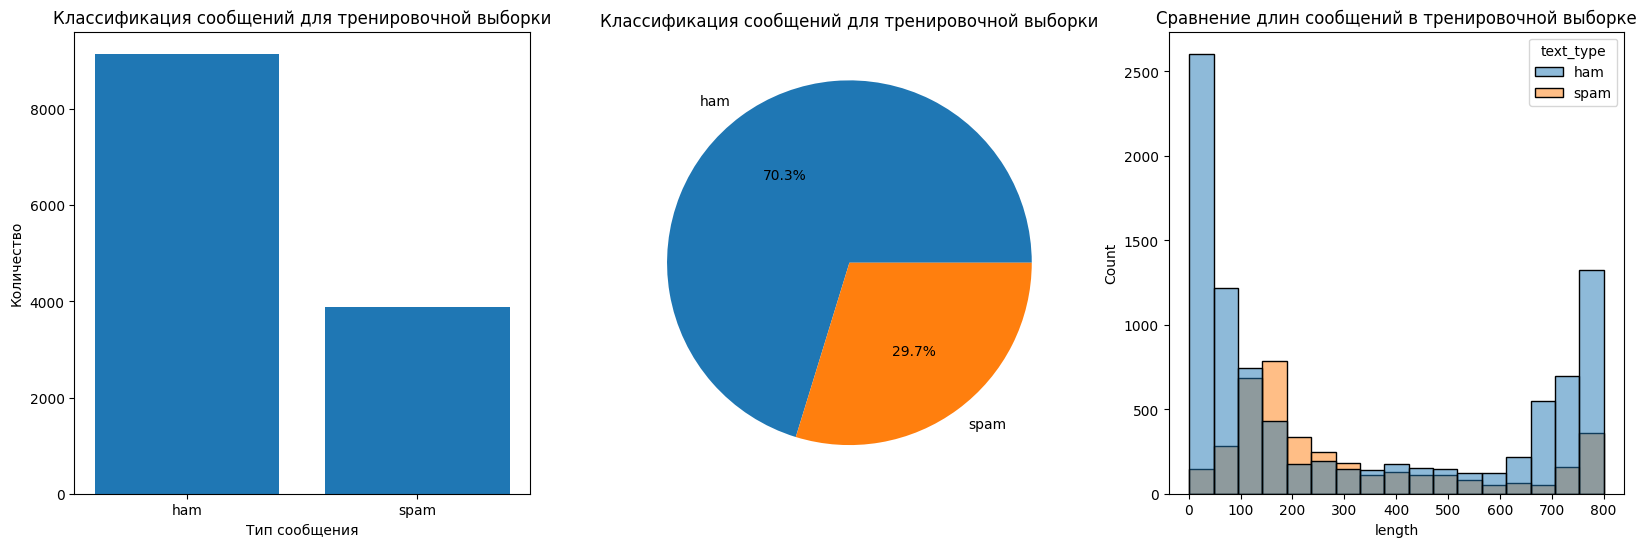

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

count_data = y_train.value_counts()

plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.bar(count_data.index, count_data.values)
plt.title('Классификация сообщений для тренировочной выборки')
plt.xlabel('Тип сообщения')
plt.ylabel('Количество')

plt.subplot(1, 3, 2)
plt.pie(count_data.values, labels=count_data.index, autopct='%1.1f%%')
plt.title('Классификация сообщений для тренировочной выборки')

plt.subplot(1, 3, 3)
sns.histplot(
    x=X_train["length"],
    hue=y_train
)
plt.title("Сравнение длин сообщений в тренировочной выборке")
plt.show()

plt.tight_layout(pad=5.0)
plt.show()

In [13]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

def remove_non_english_with_lemmatizer(text):
    """
    Выполняет предобработку текста с использованием Lemmatizer.

    Параметры:
        text: Данные из столбца.

    Возвращает:
        text: Обработанные данные из столбца.
    """
    text = re.sub(r'[\n\t\r]', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    lemmatizer = WordNetLemmatizer()
    lem_tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text)]
    return " ".join(lem_tokens)

def remove_non_english_with_stemmer(text):
    """
    Выполняет предобработку текста с использованием Stemmer.

    Параметры:
        text: Данные из столбца.

    Возвращает:
        text: Обработанные данные из столбца.
    """
    text = re.sub(r'[\n\t\r]', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    porter = PorterStemmer()
    stem_tokens = [porter.stem(word) for word in word_tokenize(text)]
    return " ".join(stem_tokens)

def remove_non_english(text):
    """
    Выполняет предобработку текста.

    Параметры:
        text: Данные из столбца.

    Возвращает:
        text: Обработанные данные из столбца.
    """
    text = re.sub(r'[\n\t\r]', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return text


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def transform_texts(X_train, X_test):
    """
    Выполняет токенизацию текста.

    Параметры:
        X_train: Данные для обучения.
        X_test: Данные для тестирования.

    Возвращает:
        X_train_transformed: Данные для обучения после токенизации.
        X_test_transformed: Данные для тестирования после токенизации.
    """

    vectorizer = TfidfVectorizer()
    X_train_transformed = vectorizer.fit_transform(X_train)
    X_test_transformed = vectorizer.transform(X_test)

    return X_train_transformed, X_test_transformed

In [16]:
from sklearn.preprocessing import LabelEncoder
X_train['clear_text'] = X_train['text'].apply(remove_non_english)
X_test['clear_text'] = X_test['text'].apply(remove_non_english)

X_train['clear_text_stemmer'] = X_train['text'].apply(remove_non_english_with_stemmer)
X_test['clear_text_stemmer'] = X_test['text'].apply(remove_non_english_with_stemmer)

X_train['clear_text_lemmatizer'] = X_train['text'].apply(remove_non_english_with_lemmatizer)
X_test['clear_text_lemmatizer'] = X_test['text'].apply(remove_non_english_with_lemmatizer)

X_train_without_modification, X_test_without_modification = transform_texts(X_train['clear_text'], X_test['clear_text'])
X_train_stemmer, X_test_stemmer = transform_texts(X_train['clear_text_stemmer'], X_test['clear_text_stemmer'])
X_train_lemmatizer, X_test_lemmatizer = transform_texts(X_train['clear_text_lemmatizer'], X_test['clear_text_lemmatizer'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

def multinomial_nb_grid_search(X_train, y_train, X_test, y_test):
    """
    Выполняет подбор гиперпараметров для MultinomialNB и возвращает ROC AUC-оценку для тестовой выборки.

    Параметры:
        X_train: Данные для обучения.
        y_train: Метки классов для данных для обучения.
        X_test: Данные для тестирования.
        y_test: Метки классов для данных для тестирования.

    Возвращает:
        float: ROC AUC-оценка для модели MultinomialNB с оптимальными гиперпараметрами.
    """

    param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
    grid_model = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
    grid_model.fit(X_train, y_train)
    best_params = grid_model.best_params_
    model = MultinomialNB(alpha=best_params['alpha'])
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, predictions)

    return roc_auc

In [ ]:
roc_auc_without_modification = multinomial_nb_grid_search(X_train_without_modification, y_train, X_test_without_modification, y_test)
roc_auc_lemmatizer = multinomial_nb_grid_search(X_train_lemmatizer, y_train, X_test_lemmatizer, y_test)
roc_auc_stemmer = multinomial_nb_grid_search(X_train_stemmer, y_train, X_test_stemmer, y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
print("ROC AUC-score for MultinomialNB:", roc_auc_without_modification)
print("ROC AUC-score for MultinomialNB with lemmatizer:", roc_auc_lemmatizer)
print("ROC AUC-score for MultinomialNB with stemmer:", roc_auc_stemmer)

ROC AUC-score for MultinomialNB: 0.8846440428821248
ROC AUC-score for MultinomialNB with lemmatizer: 0.8858250753985352
ROC AUC-score for MultinomialNB with stemmer: 0.8774995564792053


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

def logistic_regression_grid_search(X_train, y_train, X_test, y_test):
    """
    Выполняет подбор гиперпараметров для логистической регрессии и возвращает ROC AUC-оценку для тестовой выборки.

    Параметры:
        X_train: Данные для обучения.
        y_train: Метки классов для данных для обучения.
        X_test: Данные для тестирования.
        y_test: Метки классов для данных для тестирования.

    Возвращает:
        float: ROC AUC-оценка для модели логистической регрессии с оптимальными гиперпараметрами.
    """

    param_grid =  {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100]
    }
    grid_model = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='roc_auc', verbose=1)
    grid_model.fit(X_train, y_train)
    best_params = grid_model.best_params_
    model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'])
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, predictions)

    return roc_auc


In [ ]:
roc_auc_without_modification = logistic_regression_grid_search(X_train_without_modification, y_train, X_test_without_modification, y_test)
roc_auc_lemmatizer = logistic_regression_grid_search(X_train_lemmatizer, y_train, X_test_lemmatizer, y_test)
roc_auc_stemmer = logistic_regression_grid_search(X_train_stemmer, y_train, X_test_stemmer, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("ROC AUC-score for LogisticRegression:", roc_auc_without_modification)
print("ROC AUC-score for LogisticRegression with lemmatizer:", roc_auc_lemmatizer)
print("ROC AUC-score for LogisticRegression with stemmer:", roc_auc_stemmer)

ROC AUC-score for LogisticRegression: 0.9047722837519324
ROC AUC-score for LogisticRegression with lemmatizer: 0.9012291862027016
ROC AUC-score for LogisticRegression with stemmer: 0.901971766733406


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

def random_forest_grid_search(X_train, y_train, X_test, y_test):
    """
    Выполняет подбор гиперпараметров для случайного леса и возвращает ROC AUC-оценку для тестовой выборки.

    Параметры:
        X_train: Данные для обучения.
        y_train: Метки классов для данных для обучения.
        X_test: Данные для тестирования.
        y_test: Метки классов для данных для тестирования.

    Возвращает:
        float: ROC AUC-оценка для модели случайного леса с оптимальными гиперпараметрами.
    """

    param_grid = {
        'n_estimators': [25, 50, 100],
        'max_depth': [25, 50, 75],
        'min_samples_leaf': [2, 4, 6]
    }

    grid_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
    grid_model.fit(X_train, y_train)
    best_params = grid_model.best_params_
    model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                   max_depth=best_params['max_depth'],
                                   min_samples_leaf=best_params['min_samples_leaf'])
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, predictions)

    return roc_auc

In [ ]:
roc_auc_without_modification = random_forest_grid_search(X_train_without_modification, y_train, X_test_without_modification, y_test)
roc_auc_lemmatizer = random_forest_grid_search(X_train_lemmatizer, y_train, X_test_lemmatizer, y_test)
roc_auc_stemmer = random_forest_grid_search(X_train_stemmer, y_train, X_test_stemmer, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
print("ROC AUC-score for RandomForest:", roc_auc_without_modification)
print("ROC AUC-score for RandomForest with lemmatizer:", roc_auc_lemmatizer)
print("ROC AUC-score for RandomForest with stemmer:", roc_auc_stemmer)

ROC AUC-score for RandomForest: 0.8249030590262818
ROC AUC-score for RandomForest with lemmatizer: 0.8163469092936614
ROC AUC-score for RandomForest with stemmer: 0.830035228223129


In [ ]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.4 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

def gradient_boosting_grid_search(X_train, y_train, X_test, y_test):
    """
    Выполняет подбор гиперпараметров для градиентного бустинга и возвращает ROC AUC-оценку для тестовой выборки.

    Параметры:
        X_train: Данные для обучения.
        y_train: Метки классов для данных для обучения.
        X_test: Данные для тестирования.
        y_test: Метки классов для данных для тестирования.

    Возвращает:
        float: ROC AUC-оценка для модели градиентного бустинга с оптимальными гиперпараметрами.
    """

    param_grid = {
        'n_estimators': [30, 60, 90],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    }


    grid_model = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
    grid_model.fit(X_train, y_train)
    best_params = grid_model.best_params_
    model = XGBClassifier(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'], max_depth=best_params['max_depth'])
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, predictions)

    return roc_auc

In [ ]:
roc_auc_without_modification = gradient_boosting_grid_search(X_train_without_modification, y_train, X_test_without_modification, y_test)
roc_auc_lemmatizer = gradient_boosting_grid_search(X_train_lemmatizer, y_train, X_test_lemmatizer, y_test)
roc_auc_stemmer = gradient_boosting_grid_search(X_train_stemmer, y_train, X_test_stemmer, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
print("ROC AUC-score for XGBClassifier:", roc_auc_without_modification)
print("ROC AUC-score for XGBClassifier with lemmatizer:", roc_auc_lemmatizer)
print("ROC AUC-score for XGBClassifier with stemmer:", roc_auc_stemmer)

ROC AUC-score for XGBClassifier: 0.8689416573021568
ROC AUC-score for XGBClassifier with lemmatizer: 0.8707798925962743
ROC AUC-score for XGBClassifier with stemmer: 0.872985504819121


In [17]:
!pip install tensorflow

In [42]:
file_path_test = 'test_spam.csv'
data_test = pd.read_csv(file_path_test)

X_without_modification = data_test['text'].apply(remove_non_english)
X_lemmatizer = data_test['text'].apply(remove_non_english_with_lemmatizer)
X_stemmer = data_test['text'].apply(remove_non_english_with_stemmer)

In [43]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def lstm_model(X_train, y_train, X_test, y_test, X_test_without_labels):

    concat = pd.concat([X_train, X_test, X_test_without_labels], ignore_index=True)

    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(concat)
    text_to_sequence_train = tokenizer.texts_to_sequences(X_train)
    text_to_sequence_test = tokenizer.texts_to_sequences(X_test)
    text_to_sequence_test_without_labels = tokenizer.texts_to_sequences(X_test_without_labels)

    max_length_sequence_test = max([len(i) for i in text_to_sequence_test])
    max_length_sequence_train = max([len(i) for i in text_to_sequence_train])
    max_length_sequence_test_without_labels = max([len(i) for i in text_to_sequence_test_without_labels])

    max_length_sequence = max(max_length_sequence_test, max_length_sequence_train, max_length_sequence_test_without_labels)

    padded_sequence_train = pad_sequences(text_to_sequence_train, maxlen=max_length_sequence, padding = "pre")
    padded_sequence_test = pad_sequences(text_to_sequence_test, maxlen=max_length_sequence, padding = "pre")
    padded_sequence_test_without_labels = pad_sequences(text_to_sequence_test_without_labels, maxlen=max_length_sequence, padding = "pre")

    model = Sequential()

    feature_num=128
    vocabulary_size = len(tokenizer.word_index) + 1

    model.add(
      Embedding(
          input_dim=vocabulary_size,
          output_dim=feature_num,
          input_length=max_length_sequence
      )
    )

    model.add(
      LSTM(
      units=128
      )
    )

    model.add(
      Dense(
          units=1,
          activation="sigmoid"
      )
    )

    model.compile(
      optimizer=Adam(
      learning_rate=0.001),
      loss="binary_crossentropy",
      metrics = ["accuracy"]
    )

    model.fit(padded_sequence_train, y_train, epochs=5, validation_split=0.2, batch_size=16)

    predictions = model.predict(padded_sequence_test)
    predictions= (predictions > 0.5)
    roc_auc = roc_auc_score(y_test, predictions)

    return roc_auc, model, padded_sequence_test_without_labels

In [44]:
roc_auc_without_modification, model_without_modification, padded_sequence_test_without_labels  = lstm_model(X_train['clear_text'], y_train, X_test['clear_text'], y_test, X_without_modification)
roc_auc_lemmatizer, model_lemmatizer, padded_sequence_test_without_labels_lemmatizer = lstm_model(X_train['clear_text_lemmatizer'], y_train, X_test['clear_text_lemmatizer'], y_test, X_lemmatizer)
roc_auc_stemmer, model_stemmer, padded_sequence_test_without_labels_stemmer = lstm_model(X_train['clear_text_stemmer'], y_train, X_test['clear_text_stemmer'], y_test, X_stemmer)

Epoch 1/5
652/652 [==============================] - 74s 111ms/step - loss: 0.2812 - accuracy: 0.8871 - val_loss: 0.1737 - val_accuracy: 0.9382
Epoch 2/5
652/652 [==============================] - 73s 112ms/step - loss: 0.0952 - accuracy: 0.9671 - val_loss: 0.2259 - val_accuracy: 0.9351
Epoch 3/5
652/652 [==============================] - 72s 111ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.2417 - val_accuracy: 0.9386
Epoch 4/5
652/652 [==============================] - 73s 112ms/step - loss: 0.0358 - accuracy: 0.9878 - val_loss: 0.2372 - val_accuracy: 0.9255
Epoch 5/5
102/102 [==============================] - 6s 58ms/step
Epoch 1/5
652/652 [==============================] - 73s 109ms/step - loss: 0.3558 - accuracy: 0.8591 - val_loss: 0.2700 - val_accuracy: 0.9121
Epoch 2/5
652/652 [==============================] - 72s 111ms/step - loss: 0.1985 - accuracy: 0.9175 - val_loss: 0.1781 - val_accuracy: 0.9321
Epoch 3/5
652/652 [==============================] - 72s 110ms/step - 

In [45]:
print("ROC AUC-score for LSTM:", roc_auc_without_modification)
print("ROC AUC-score for LSTM with lemmatizer:", roc_auc_lemmatizer)
print("ROC AUC-score for LSTM with stemmer:", roc_auc_stemmer)

ROC AUC-score for LSTM: 0.9081303697696226
ROC AUC-score for LSTM with lemmatizer: 0.9215905922903415
ROC AUC-score for LSTM with stemmer: 0.9214689408723421


In [53]:
predictions = model_lemmatizer.predict(padded_sequence_test_without_labels_lemmatizer)
predictions= (predictions > 0.5)
data_test['score'] = np.where(predictions == 0, 'ham', 'spam')

128/128 [==============================] - 8s 59ms/step


,text,score
0,j jim whitehead ejw cse ucsc edu writes j you ...,ham
1,original message from bitbitch magnesium net p...,ham
2,java for managers vince durasoft who just taug...,ham
3,there is a youtuber name saiman says,ham
4,underpriced issue with high return on equity t...,spam
5,aight lemme know whats up,ham
6,hey girl how r u hope u r well me an del r bak...,ham
7,carnegie mellon recruiting good afternoon i ha...,ham
8,cv of rodney greene re quantitative positions ...,ham
9,i cant able to cos of me he drunk today im rea...,ham


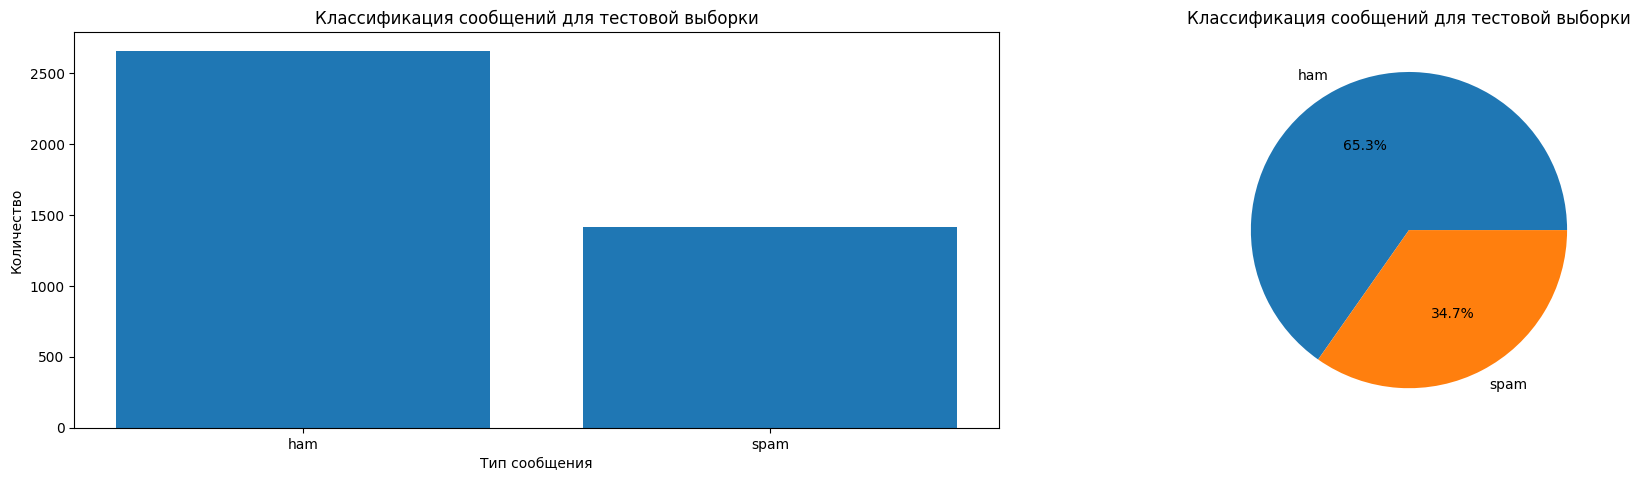

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

count_data = data_test['score'].value_counts()

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.bar(count_data.index, count_data.values)
plt.title('Классификация сообщений для тестовой выборки')
plt.xlabel('Тип сообщения')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
plt.pie(count_data.values, labels=count_data.index, autopct='%1.1f%%')
plt.title('Классификация сообщений для тестовой выборки')

plt.tight_layout(pad=5.0)
plt.show()

In [58]:
data_test.to_csv('test_output.csv', index=False)